In [6]:
from evaluate import evaluate_metrics
import pickle
filename ='output.p'
with open("data/meta.p", "rb") as f:
    meta = pickle.load(f)
print(f"meta: {type(meta)}, max ABP {meta['max_abp']}, min ABP {meta['min_abp']}")

meta: <class 'dict'>, max ABP 178.8, min ABP 60.2


In [7]:
evaluate_metrics(filename)

SBP
Mean Absolute Error :  5.162
Root Mean Squared Error :  8.507
R2 :  0.7773010395437779

DBP
Mean Absolute Error :  2.894
Root Mean Squared Error :  4.807
R2 :  0.7166817631615102

MAP
Mean Absolute Error :  2.560245944053685
Root Mean Squared Error :  4.8
R2 :  0.8138830623751265
------------------------------------------------------------------------


# BHS

----------------------------
|        BHS-Metric        |
----------------------------
----------------------------------------
|     | <= 5mmHg | <=10mmHg | <=15mmHg |
----------------------------------------
| DBP |  73.6 %  |  89.8 %  |  95.1 %  |
| MAP |  78.7 %  |  89.5 %  |  94.3 %  |
| SBP |  55.9 %  |  77.0 %  |  85.9 %  |
----------------------------------------


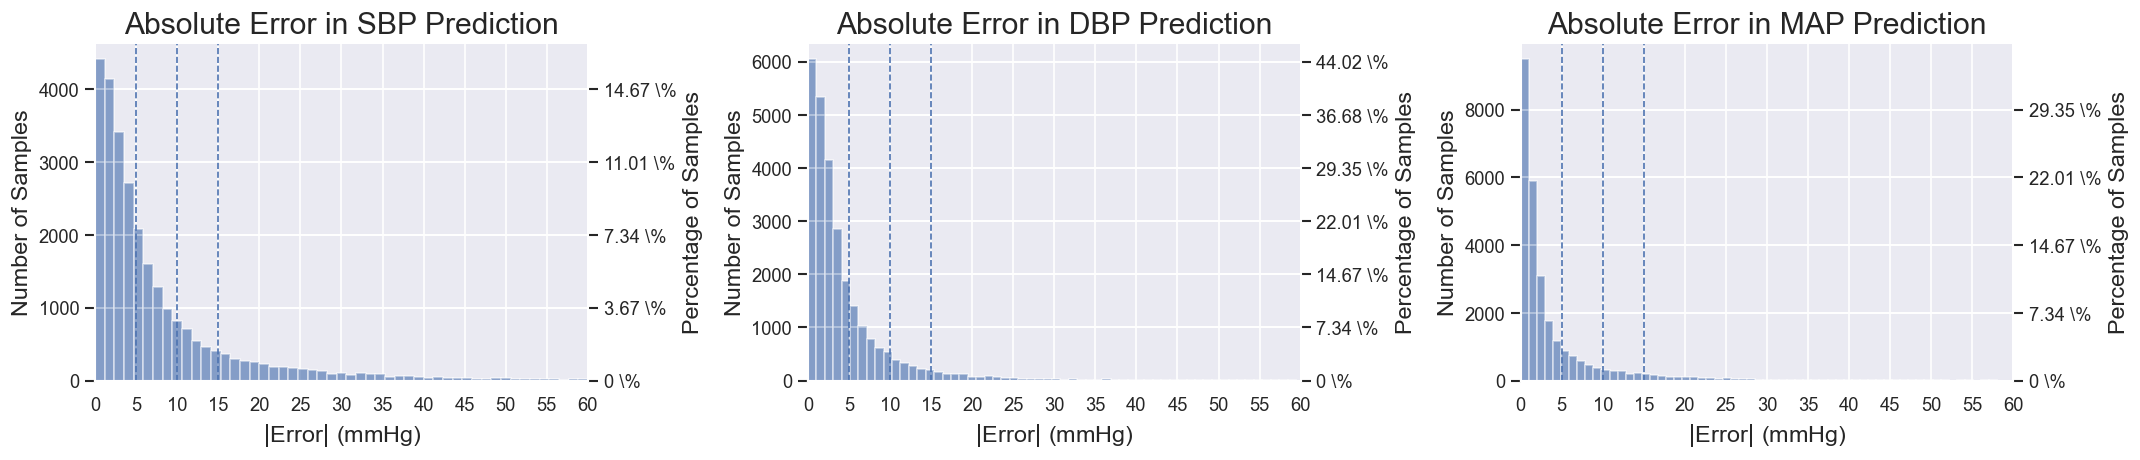

In [10]:
from evaluate import evaluate_BHS_Standard

evaluate_BHS_Standard(filename)

# AAMI

---------------------
|   AAMI Standard   |
---------------------
-----------------------
|     |  ME   |  STD  |
-----------------------
| DBP | 0.894 | 7.204 |
| MAP | 0.64 | 7.213 |
| SBP | -0.339 | 12.82 |
-----------------------


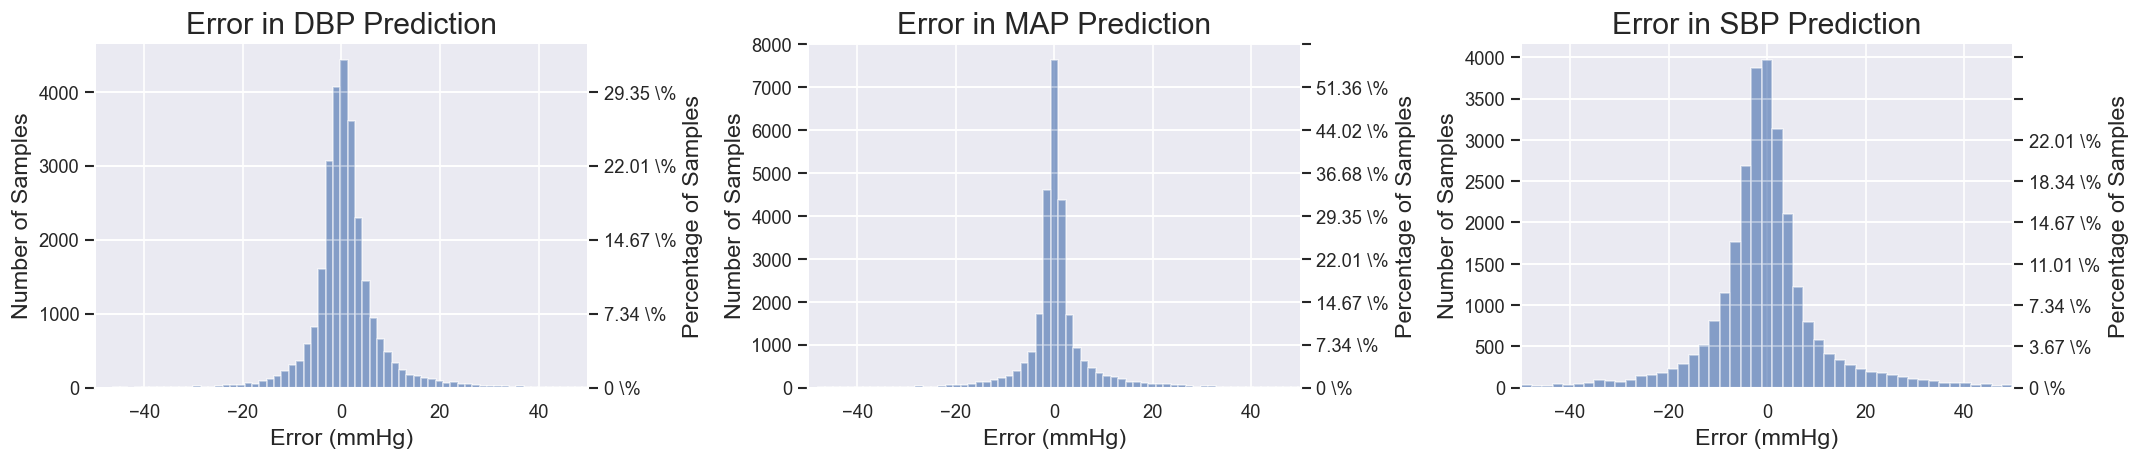

In [11]:
from evaluate import evaluate_AAMI_Standard

evaluate_AAMI_Standard(filename)

# BP Classification Accuracy

DBPS Classification Accuracy
                  precision    recall  f1-score   support

    Hypertension    0.81929   0.68399   0.74555      5329
    Normotension    0.86165   0.91140   0.88582     15259
Pre-hypertension    0.63409   0.63399   0.63404      6672

        accuracy                        0.79905     27260
       macro avg    0.77167   0.74313   0.75514     27260
    weighted avg    0.79767   0.79905   0.79678     27260

SBPS Classification Accuracy
                 precision    recall  f1-score   support

   Hypertension    0.93542   0.97042   0.95260     20523
   Normotension    0.87625   0.57289   0.69282      1372
Prehypertension    0.78845   0.74539   0.76631      5365

       accuracy                        0.90613     27260
      macro avg    0.86671   0.76290   0.80391     27260
   weighted avg    0.90352   0.90613   0.90286     27260



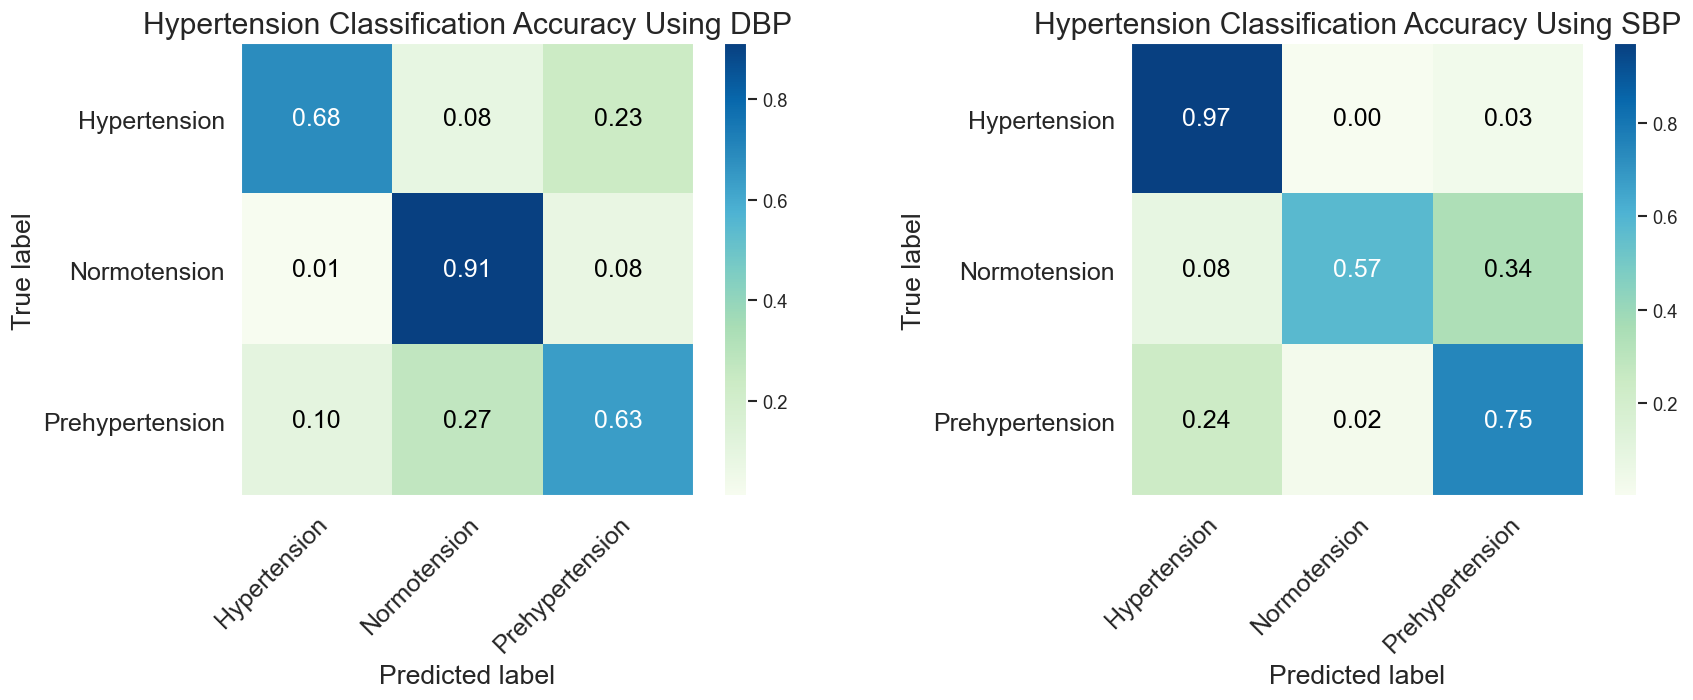

In [6]:
from evaluate import evaluate_BP_Classification

evaluate_BP_Classification(filename)

# Bland Altman Plot

---------DBP---------
15.01289140951187 -13.224911847125636
---------MAP---------
14.776662965314388 -13.497140239697037
---------SBP---------
24.78878005089854 -25.466742213473953


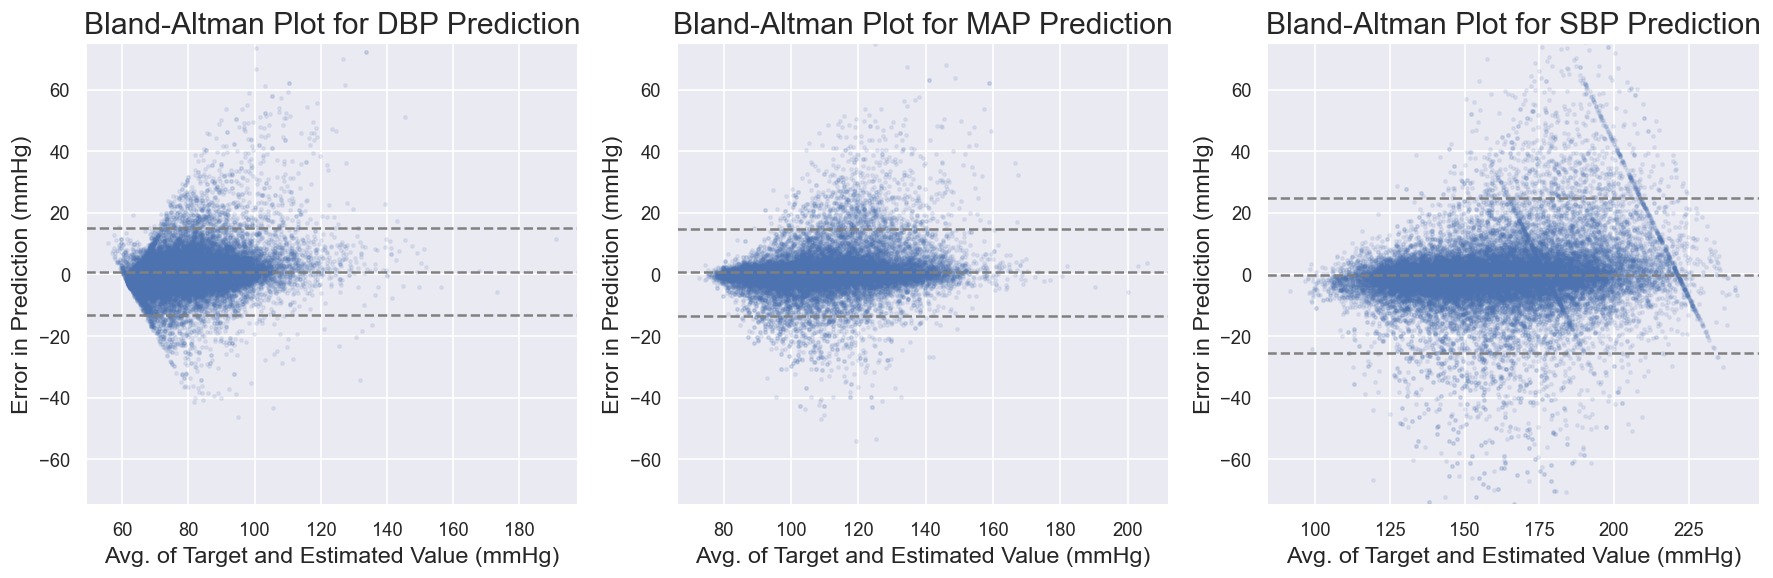

In [7]:
from evaluate import bland_altman_plot

bland_altman_plot(filename)

# Regression Plot

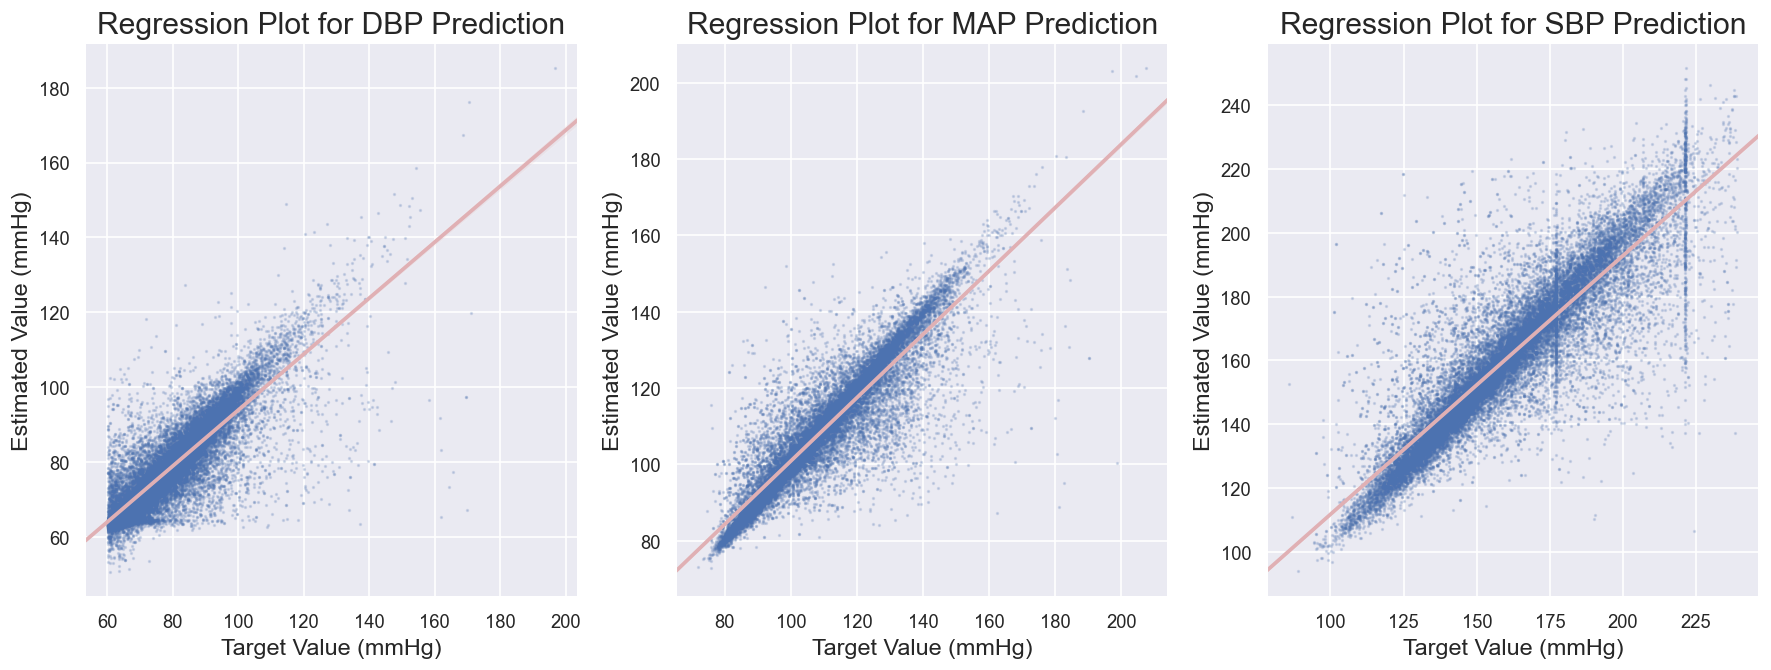

DBP
LinregressResult(slope=0.7475389081589707, intercept=19.164407457390816, rvalue=0.8491615701356257, pvalue=0.0, stderr=0.0028160470588399116)
MAP
LinregressResult(slope=0.8302540353685318, intercept=17.833446954763886, rvalue=0.9031053356372152, pvalue=0.0, stderr=0.0023911506459611364)
SBP
LinregressResult(slope=0.809116825462319, intercept=30.985753071075266, rvalue=0.8824107982631398, pvalue=0.0, stderr=0.0026129695486948133)


In [8]:
from evaluate import regression_plot

regression_plot(filename)

## Trying to get MAE

In [1]:
import pickle
import numpy as np
import os
dt = pickle.load(open(os.path.join('data', 'test.p'), 'rb'))			# loading test data
X_test = dt['X_test']
Y_test = dt['Y_test']
dt = pickle.load(open(os.path.join('data', 'meta.p'), 'rb'))			# loading metadata
# max_ppg = dt['max_ppg']
# min_ppg = dt['min_ppg']
max_abp = dt['max_abp']
min_abp = dt['min_abp']
Y_test_pred = pickle.load(open('output.p', 'rb'))	# loading output from refinement network

# abp_signal_pred = Y_test_pred * max_abp + min_abp								# abp waveform predicted
# abp_signal_ground_truth = Y_test * max_abp + min_abp								# abp waveform ground truth
abp_signal_pred = Y_test_pred * (max_abp - min_abp)
abp_signal_ground_truth = Y_test * (max_abp - min_abp)
print(f"abp_signal_pred, abp_signal_ground_truth: {abp_signal_pred.shape}, {abp_signal_ground_truth.shape}")

sbps = []
dbps = []
maps = []
record_maes = []
for i in (range(len(abp_signal_pred))):
    y_t = abp_signal_ground_truth[i].ravel()
    y_p = abp_signal_pred[i].ravel()
    
    dbp_err = min(y_t)-min(y_p)
    sbp_err = max(y_t)-max(y_p)
    map_err = np.mean(y_t)-np.mean(y_p)
    record_err = np.mean(abs(y_t-y_p))
    if i==0:
        print("For record 0:")
        print(f"y_t, y_p: {y_t.shape}, {y_p.shape}")
        print(f"dbp_err, sbp_err, map_err: {dbp_err}, {sbp_err}, {map_err}\n")

    sbps.append(abs(sbp_err))
    dbps.append(abs(dbp_err))
    maps.append(abs(map_err))
    record_maes.append(record_err)
sbp_mae = np.mean(sbps)
dbp_mae = np.mean(dbps)
map_mae = np.mean(maps)
record_mae = np.mean(record_maes)
print(f"dbp_mae, sbp_mae, map_mae: {dbp_mae, sbp_mae, map_mae}")
print(f"record_mae {record_mae}")

abp_signal_pred, abp_signal_ground_truth: (27260, 1, 1250), (27260, 1250, 1)
For record 0:
y_t, y_p: (1250,), (1250,)
dbp_err, sbp_err, map_err: -5.446866726539817, -1.7201308093488024, -2.56083453002595

dbp_mae, sbp_mae, map_mae: (2.90440969411967, 5.161747776116802, 2.560245944053685)
record_mae 4.06140420352927
